# Introduction to Machine Learning - Linear Regression

### Import packages

In [45]:
# Import all necessary packages/libraries
import numpy as np              # numerical python for math operations
import matplotlib.pyplot as plt # for visualializations
import matplotlib.animation as animation
from IPython.display import Image, display # for loading images into this notebook

### Generate sample data and plot

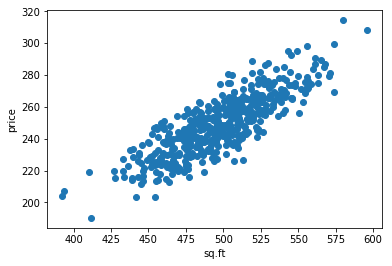

In [46]:
# Generate sample data with some noise and plot it
sample_x = np.random.normal(500,30,500)
noise = np.random.normal(0,10,(500,))
sample_y = 0.5*sample_x + 0 + noise
plt.scatter(sample_x, sample_y)
plt.xlabel("sq.ft")
plt.ylabel("price")
plt.show()

### Cost Function

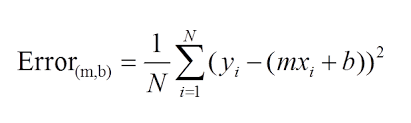

In [47]:
display(Image(filename='cost_function.png') )

def cost(m,b):
    total_error = sum([(sample_y[i] - (m*sample_x[i]+b))**2 for i in range(len(sample_x))])
    return total_error/len(sample_x)

### Simple Gradient Descent

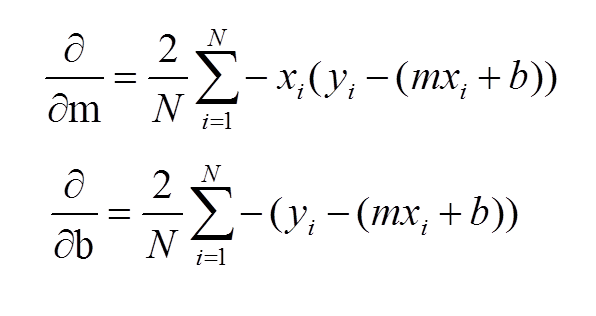

In [48]:
# Single Gradient Descent step
display(Image(filename='linear_regression_gradient1.png') )
def gradient_descent_step(m_current, b_current, learning_rate):    
    l =  len(sample_x)    
    m_gradient = sum([sample_x[i] * (sample_y[i]-(m_current*sample_x[i]+b_current)) for i in range(l)])*(-2/l)
    b_gradient = sum((sample_y[i]-(m_current*sample_x[i]+b_current)) for i in range(l))*(-2/l)    
    return m_current - learning_rate*m_gradient, b_current - learning_rate*b_gradient

### Linear Regression

In [54]:
# run gradient descent several times to reach global minima
m_anim = []
b_anim = []
def linear_regression_runner():
    m, b = 0, 0 # start with some random line at the end of this method, we should get a best fit
    num_gradient_steps = 100
    learning_rate = 1e-7         
    while num_gradient_steps > 0:
        num_gradient_steps -= 1
        m, b = gradient_descent_step(m,b,learning_rate)  
        if num_gradient_steps % 5 == 0:
            m_anim.append(m)
            b_anim.append(b)
            

In [75]:
linear_regression_runner()

<IPython.core.display.Javascript object>


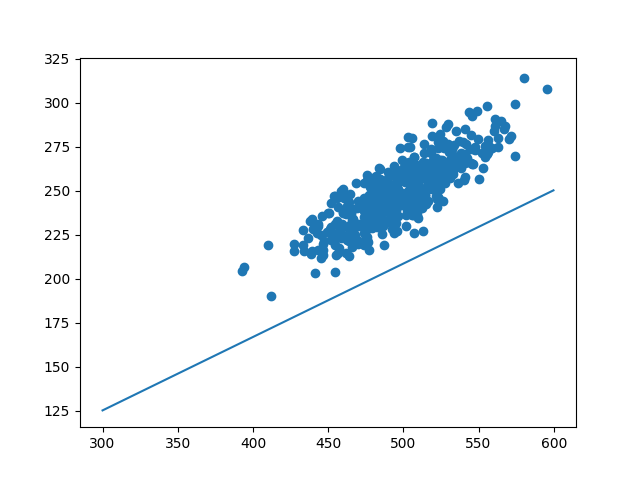

In [87]:
%matplotlib nbagg
Xaxis = np.arange(300., 600., 0.2)
Yaxis = 0*Xaxis+0
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.title("Gradient Descent Fitting Regression line")
plt.xlabel("sq.ft")
plt.ylabel("price")

def animate(i):    
    Yaxis = m_anim[i]*Xaxis+b_anim[i]     
    ax.clear()
    ax.scatter(sample_x, sample_y)
    ax.plot(Xaxis, Yaxis)   
ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, len(m_anim)), interval=1000)
plt.show()